In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from IPython.display import display
import seaborn as sns

In [2]:
input_woa=pd.read_csv(r'E:\Thesis\Hybridization of WOA & FW For Task Scheduling in Fog Computing\Notes\woa.csv')
input_fwa=pd.read_csv(r'E:\Thesis\Hybridization of WOA & FW For Task Scheduling in Fog Computing\Notes\fwa.csv')
input_seq=pd.read_csv(r'E:\Thesis\Hybridization of WOA & FW For Task Scheduling in Fog Computing\Notes\seq.csv')

In [3]:
input_woa.head(20)

,hosts,vms,cloudlets,woa_time,woa_fitness,woa_cpu_util,woa_ram_util,woa_bw_util,woa_power,woa_cpu_mean,woa_cpu_std
0,100,50,100,8.50,29.935562,47797.55,9.21,9.23,35.88,5.85,12.51
1,100,50,100,9.82,29.644931,52392.89,10.22,10.24,35.84,5.59,13.05
2,100,50,100,9.41,28.714299,51904.22,6.25,6.27,35.85,5.68,13.33
3,100,50,100,8.54,28.866648,50260.76,9.22,9.25,35.93,6.19,13.44
4,100,50,100,8.28,28.884197,48358.70,8.23,8.25,35.87,5.77,13.15
5,100,50,100,7.20,29.684624,47844.36,8.33,8.35,36.08,7.21,14.32
6,100,50,100,6.82,28.143205,53998.62,7.36,7.38,36.26,8.41,14.33
7,100,50,100,8.58,29.125397,52118.17,8.24,8.27,35.90,5.99,14.24
8,100,50,100,7.54,31.035723,52647.17,4.41,4.43,35.95,6.36,13.60
9,100,50,100,9.12,28.839316,48034.51,7.27,7.30,35.89,5.95,12.80


In [4]:
# Filtering data for different cloudlets
cloudlet_100 = input_woa[input_woa['cloudlets'] == 100]
cloudlet_80 = input_woa[input_woa['cloudlets'] == 80]
cloudlet_60 = input_woa[input_woa['cloudlets'] == 60]
# Adding  a column to identify cloudlet cases
cloudlet_100['cloudlet_case'] = '100 Cloudlets'
cloudlet_80['cloudlet_case'] = '80 Cloudlets'
cloudlet_60['cloudlet_case'] = '60 Cloudlets'

# Combine all into one dataframe
combined_df = pd.concat([cloudlet_100, cloudlet_80, cloudlet_60], axis=0)


C:\Users\User\AppData\Local\Temp\ipykernel_21520\2871386907.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudlet_100['cloudlet_case'] = '100 Cloudlets'
C:\Users\User\AppData\Local\Temp\ipykernel_21520\2871386907.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudlet_80['cloudlet_case'] = '80 Cloudlets'
C:\Users\User\AppData\Local\Temp\ipykernel_21520\2871386907.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

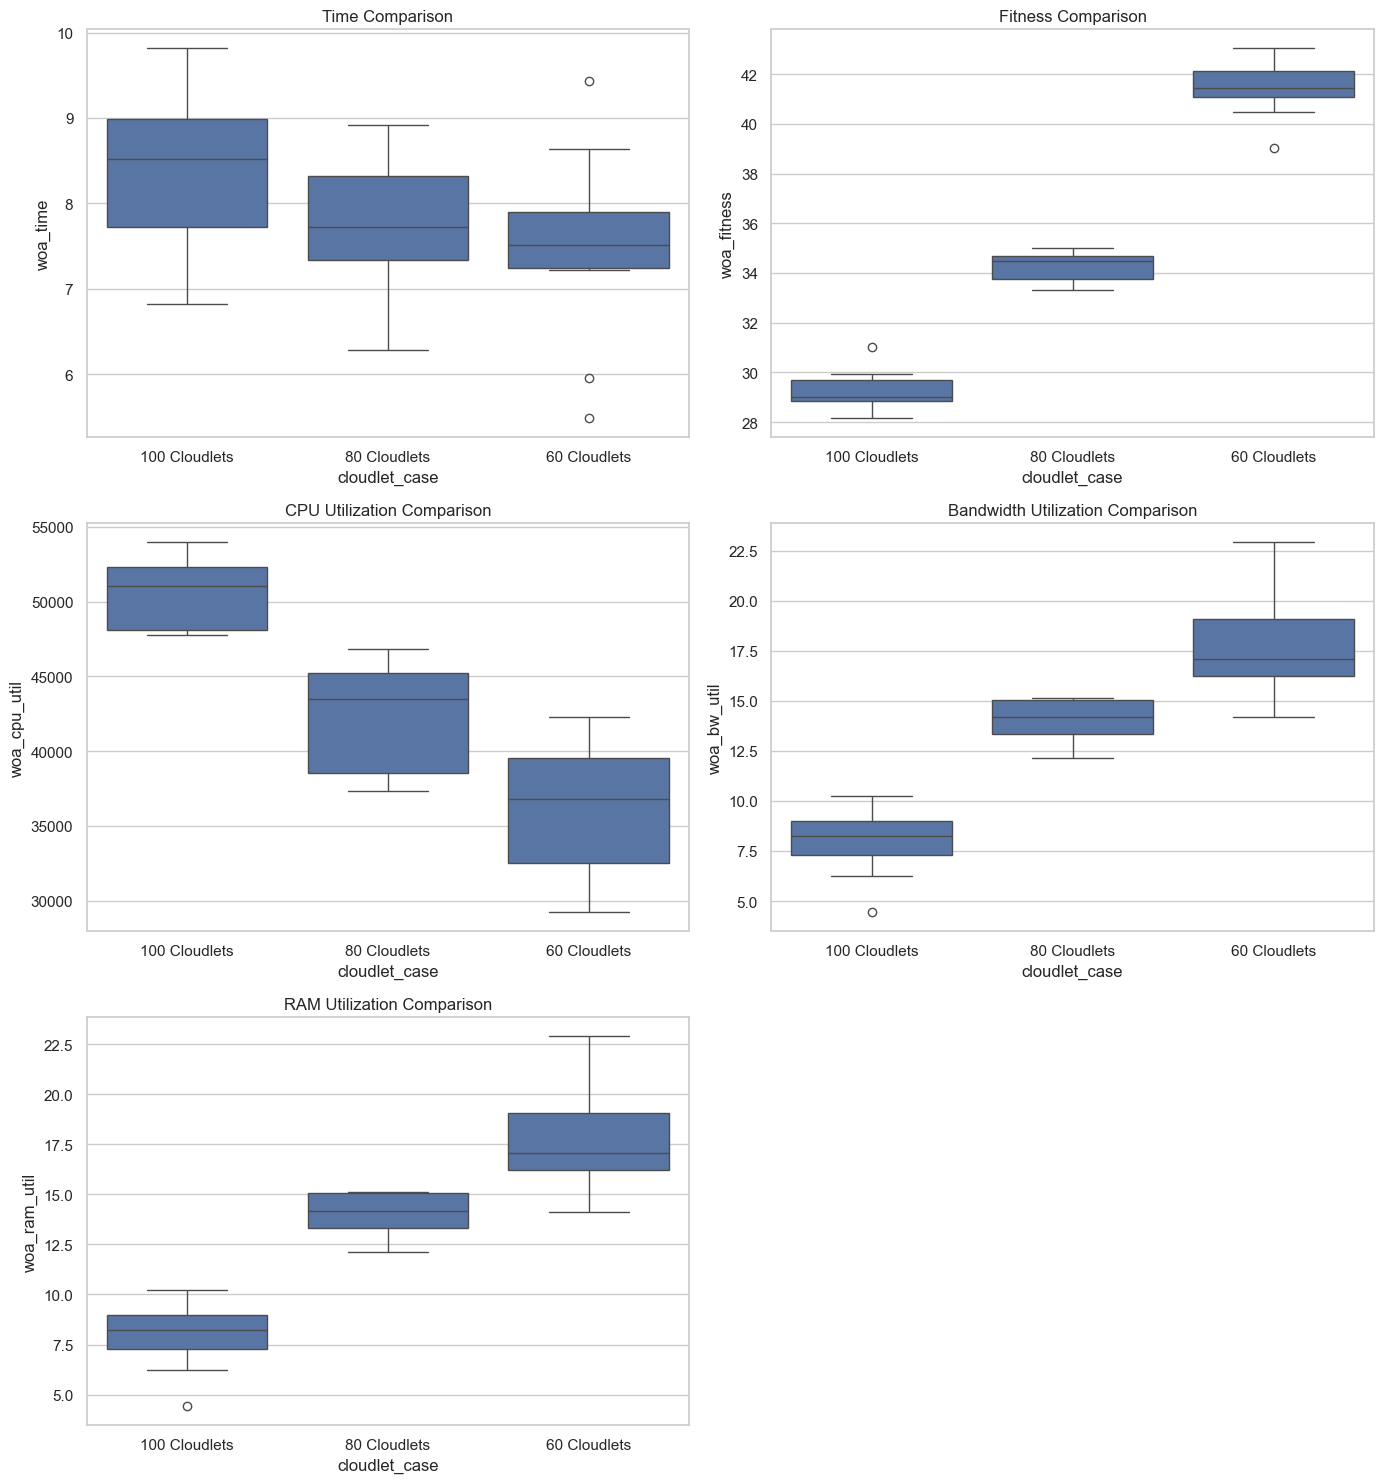

In [5]:

# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Plot Time
sns.boxplot(x='cloudlet_case', y='woa_time', data=combined_df, ax=axes[0, 0])
axes[0, 0].set_title('Time Comparison')

# Plot Fitness
sns.boxplot(x='cloudlet_case', y='woa_fitness', data=combined_df, ax=axes[0, 1])
axes[0, 1].set_title('Fitness Comparison')

# Plot CPU Utilization
sns.boxplot(x='cloudlet_case', y='woa_cpu_util', data=combined_df, ax=axes[1, 0])
axes[1, 0].set_title('CPU Utilization Comparison')

# Plot Bandwidth Utilization
sns.boxplot(x='cloudlet_case', y='woa_bw_util', data=combined_df, ax=axes[1, 1])
axes[1, 1].set_title('Bandwidth Utilization Comparison')

# Plot RAM Utilization
sns.boxplot(x='cloudlet_case', y='woa_ram_util', data=combined_df, ax=axes[2, 0])
axes[2, 0].set_title('RAM Utilization Comparison')

# Hide the empty subplot
axes[2, 1].axis('off')


plt.tight_layout()
plt.show()


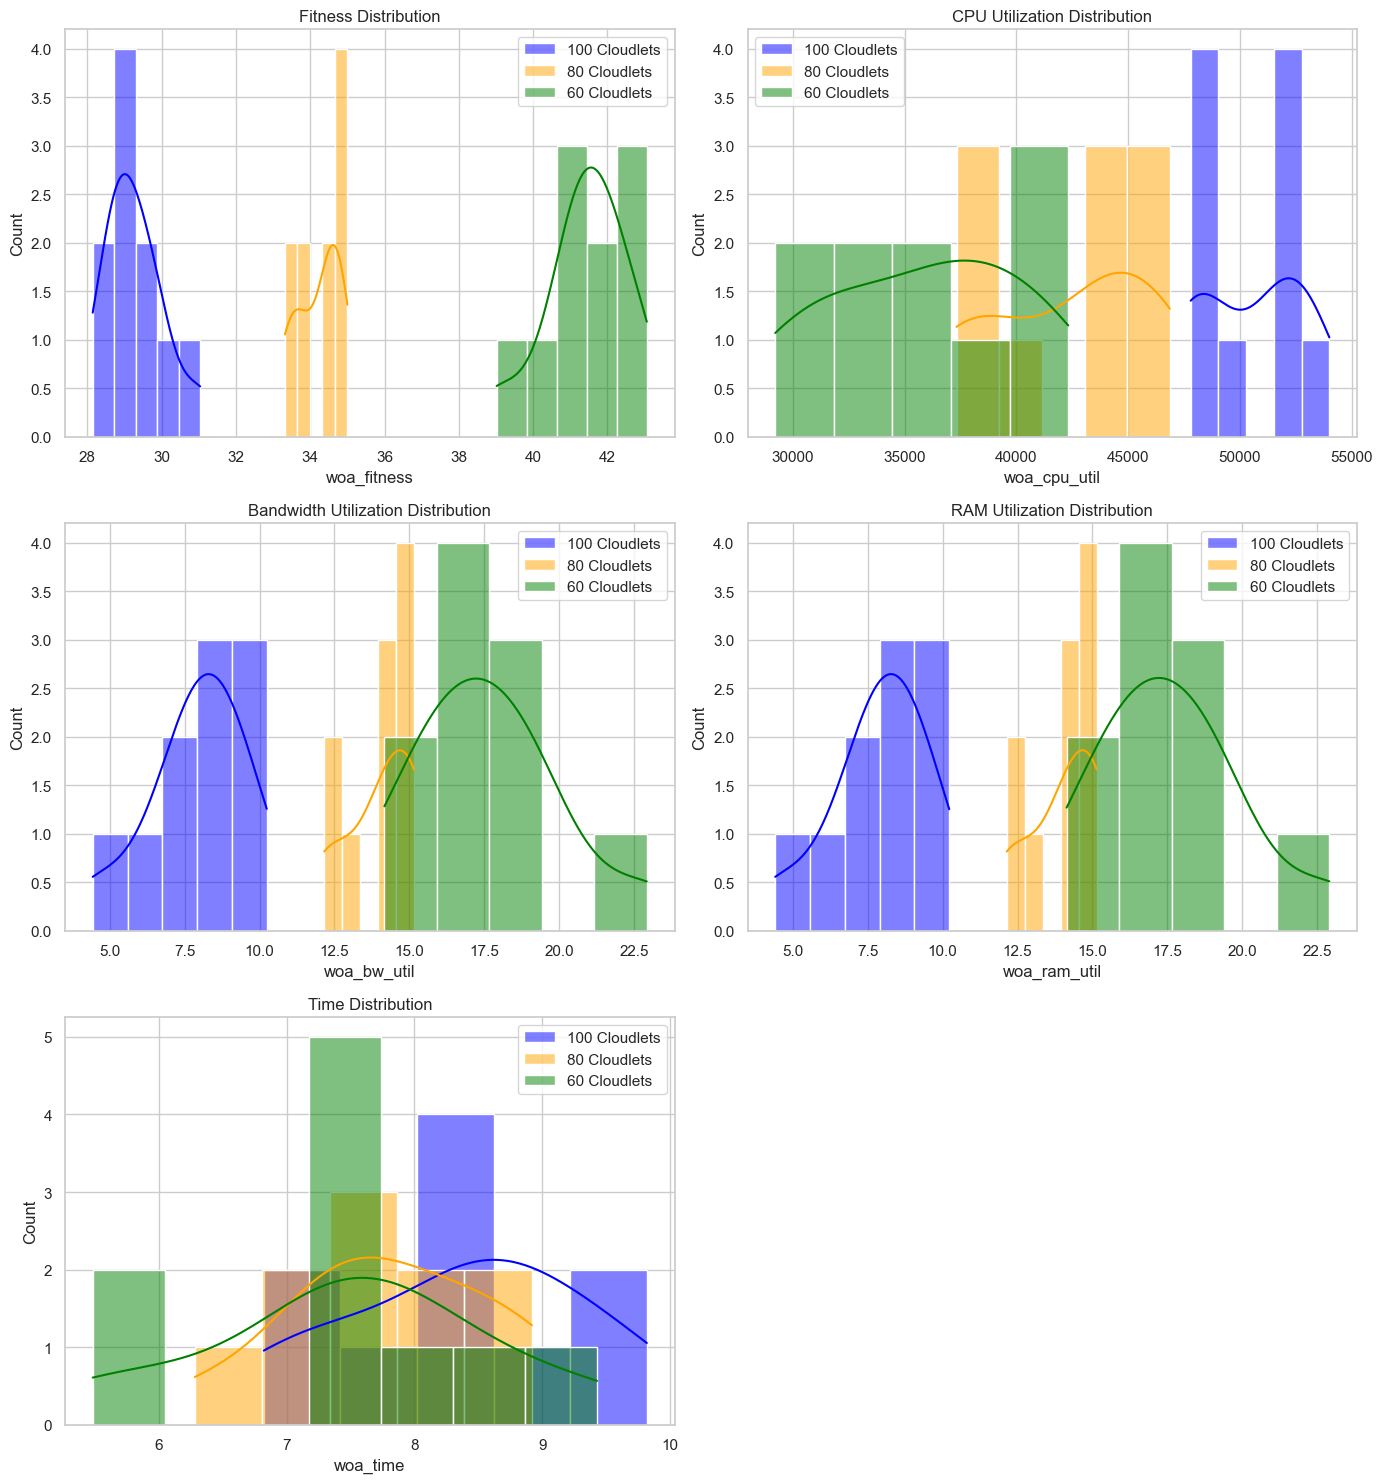

In [6]:

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Plot Fitness
sns.histplot(cloudlet_100['woa_fitness'], color='blue', label='100 Cloudlets', ax=axes[0, 0], kde=True)
sns.histplot(cloudlet_80['woa_fitness'], color='orange', label='80 Cloudlets', ax=axes[0, 0], kde=True)
sns.histplot(cloudlet_60['woa_fitness'], color='green', label='60 Cloudlets', ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Fitness Distribution')
axes[0, 0].legend()

# Plot CPU Utilization
sns.histplot(cloudlet_100['woa_cpu_util'], color='blue', label='100 Cloudlets', ax=axes[0, 1], kde=True)
sns.histplot(cloudlet_80['woa_cpu_util'], color='orange', label='80 Cloudlets', ax=axes[0, 1], kde=True)
sns.histplot(cloudlet_60['woa_cpu_util'], color='green', label='60 Cloudlets', ax=axes[0, 1], kde=True)
axes[0, 1].set_title('CPU Utilization Distribution')
axes[0, 1].legend()

# Plot Bandwidth Utilization
sns.histplot(cloudlet_100['woa_bw_util'], color='blue', label='100 Cloudlets', ax=axes[1, 0], kde=True)
sns.histplot(cloudlet_80['woa_bw_util'], color='orange', label='80 Cloudlets', ax=axes[1, 0], kde=True)
sns.histplot(cloudlet_60['woa_bw_util'], color='green', label='60 Cloudlets', ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Bandwidth Utilization Distribution')
axes[1, 0].legend()

# Plot RAM Utilization
sns.histplot(cloudlet_100['woa_ram_util'], color='blue', label='100 Cloudlets', ax=axes[1, 1], kde=True)
sns.histplot(cloudlet_80['woa_ram_util'], color='orange', label='80 Cloudlets', ax=axes[1, 1], kde=True)
sns.histplot(cloudlet_60['woa_ram_util'], color='green', label='60 Cloudlets', ax=axes[1, 1], kde=True)
axes[1, 1].set_title('RAM Utilization Distribution')
axes[1, 1].legend()

# Plot Time
sns.histplot(cloudlet_100['woa_time'], color='blue', label='100 Cloudlets', ax=axes[2, 0], kde=True)
sns.histplot(cloudlet_80['woa_time'], color='orange', label='80 Cloudlets', ax=axes[2, 0], kde=True)
sns.histplot(cloudlet_60['woa_time'], color='green', label='60 Cloudlets', ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Time Distribution')
axes[2, 0].legend()

# Hide the empty subplot
axes[2, 1].axis('off')


plt.tight_layout()
plt.show()


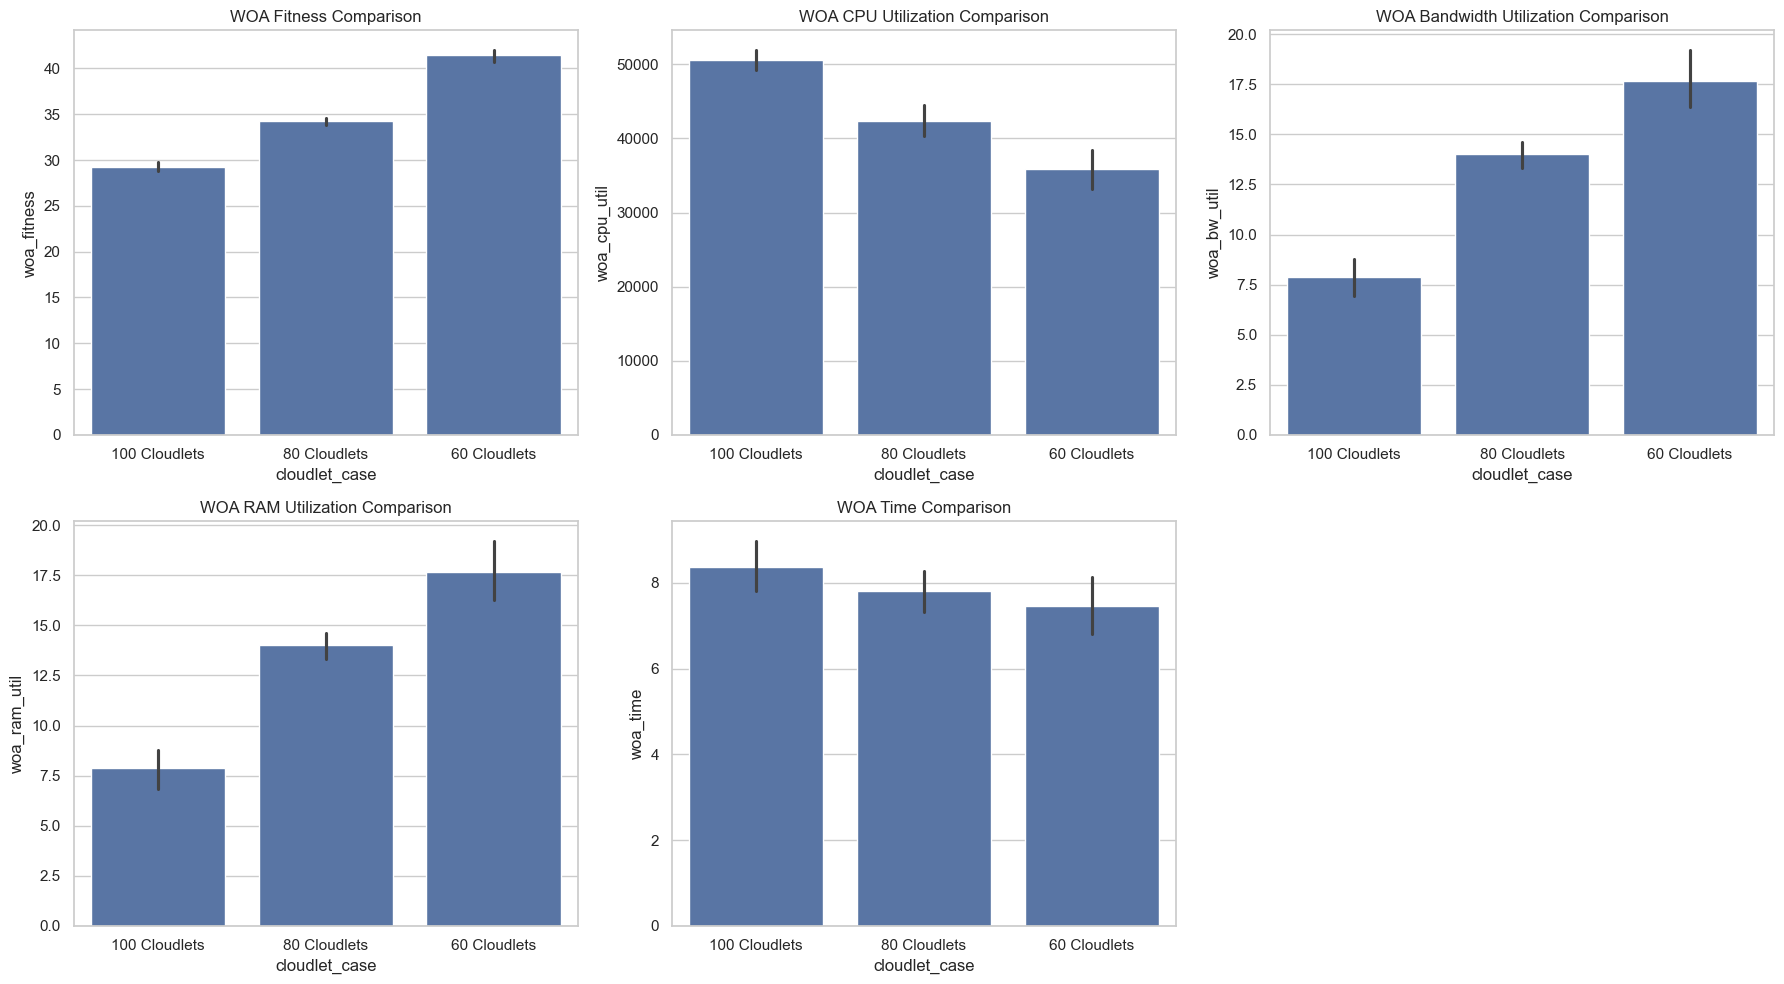

In [7]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot Fitness
sns.barplot(x='cloudlet_case', y='woa_fitness', data=combined_df, ax=axes[0, 0])
axes[0, 0].set_title('WOA Fitness Comparison')

# Plot CPU Utilization
sns.barplot(x='cloudlet_case', y='woa_cpu_util', data=combined_df, ax=axes[0, 1])
axes[0, 1].set_title('WOA CPU Utilization Comparison')

# Plot Bandwidth Utilization
sns.barplot(x='cloudlet_case', y='woa_bw_util', data=combined_df, ax=axes[0, 2])
axes[0, 2].set_title('WOA Bandwidth Utilization Comparison')

# Plot RAM Utilization
sns.barplot(x='cloudlet_case', y='woa_ram_util', data=combined_df, ax=axes[1, 0])
axes[1, 0].set_title('WOA RAM Utilization Comparison')

# Plot Time
sns.barplot(x='cloudlet_case', y='woa_time', data=combined_df, ax=axes[1, 1])
axes[1, 1].set_title('WOA Time Comparison')

# Hide the empty subplot
axes[1, 2].axis('off')


plt.tight_layout()
plt.show()


**Combined Graphs for FWA and WOA**

In [8]:
# Rename columns in input1 (fwa) to match input (woa), if necessary
input_fwa.rename(columns={
    'fwa_time': 'time',
    'fwa_fitness': 'fitness',
    'fwa_cpu_util': 'cpu_util',
    'fwa_bw_util': 'bw_util',
    'fwa_ram_util': 'ram_util'
}, inplace=True)

input_woa.rename(columns={
    'woa_time': 'time',
    'woa_fitness': 'fitness',
    'woa_cpu_util': 'cpu_util',
    'woa_bw_util': 'bw_util',
    'woa_ram_util': 'ram_util'
}, inplace=True)

# Adding a column to distinguish 'woa' from 'fwa' in both datasets
input_woa['algorithm'] = 'woa'
input_fwa['algorithm'] = 'fwa'

# Filter data for different cloudlet cases in the 'woa' dataset
cloudlet_100_woa = input_woa[input_woa['cloudlets'] == 100]
cloudlet_80_woa = input_woa[input_woa['cloudlets'] == 80]
cloudlet_60_woa = input_woa[input_woa['cloudlets'] == 60]

# Filter data for different cloudlet cases in the 'fwa' dataset (input_fwa)
cloudlet_100_fwa = input_fwa[input_fwa['cloudlets'] == 100]
cloudlet_80_fwa = input_fwa[input_fwa['cloudlets'] == 80]
cloudlet_60_fwa = input_fwa[input_fwa['cloudlets'] == 60]

# Add a 'cloudlet_case' column to each subset
cloudlet_100_woa['cloudlet_case'] = '100 Cloudlets'
cloudlet_80_woa['cloudlet_case'] = '80 Cloudlets'
cloudlet_60_woa['cloudlet_case'] = '60 Cloudlets'

cloudlet_100_fwa['cloudlet_case'] = '100 Cloudlets'
cloudlet_80_fwa['cloudlet_case'] = '80 Cloudlets'
cloudlet_60_fwa['cloudlet_case'] = '60 Cloudlets'

# Combine both 'woa' and 'fwa' datasets for all cloudlet cases into a single DataFrame
combined_df_woa = pd.concat([cloudlet_100_woa, cloudlet_80_woa, cloudlet_60_woa], axis=0)
combined_df_fwa = pd.concat([cloudlet_100_fwa, cloudlet_80_fwa, cloudlet_60_fwa], axis=0)

# Combine the 'woa' and 'fwa' datasets into one DataFrame
combined_df = pd.concat([combined_df_woa, combined_df_fwa], axis=0)


C:\Users\User\AppData\Local\Temp\ipykernel_21520\3206885095.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudlet_100_woa['cloudlet_case'] = '100 Cloudlets'
C:\Users\User\AppData\Local\Temp\ipykernel_21520\3206885095.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudlet_80_woa['cloudlet_case'] = '80 Cloudlets'
C:\Users\User\AppData\Local\Temp\ipykernel_21520\3206885095.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

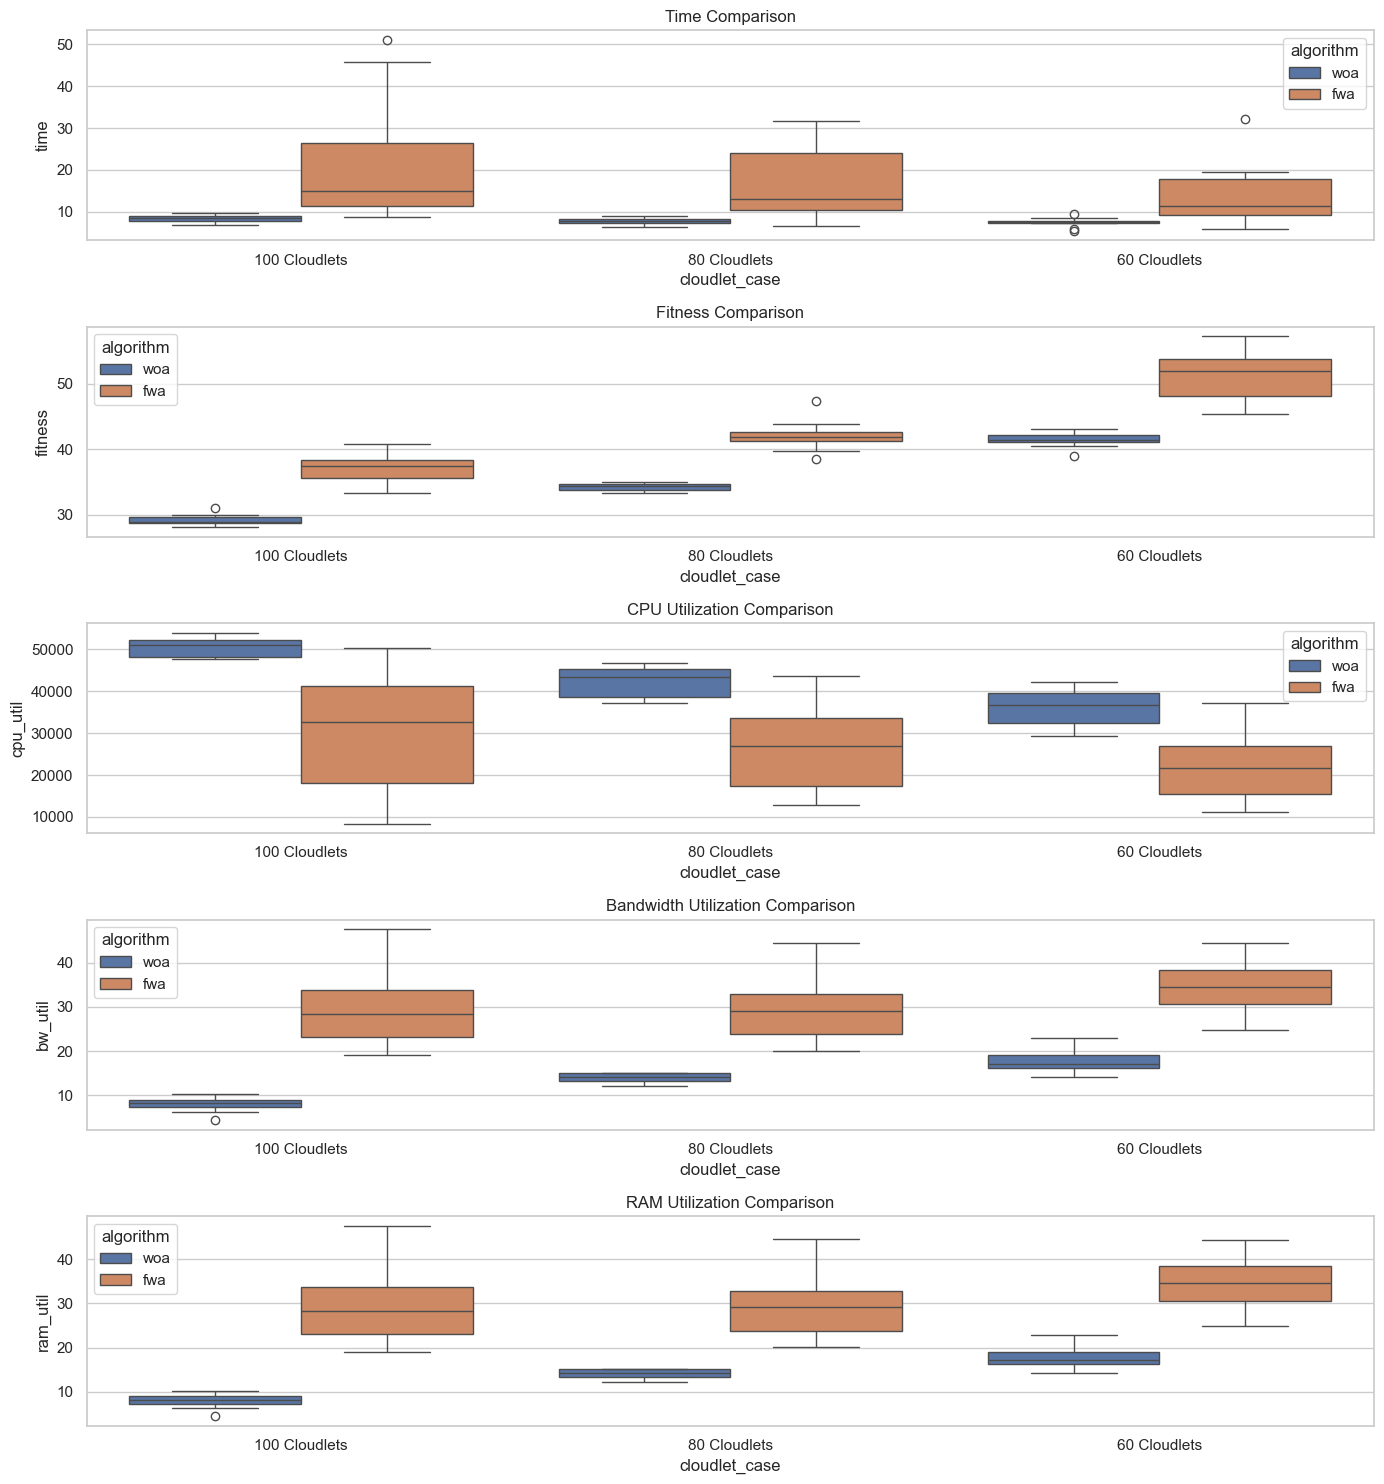

In [9]:
# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(5, 1, figsize=(14, 15))

# Plot Time
sns.boxplot(x='cloudlet_case', y='time', hue='algorithm', data=combined_df, ax=axes[0])
axes[0].set_title('Time Comparison')

# Plot Fitness
sns.boxplot(x='cloudlet_case', y='fitness', hue='algorithm', data=combined_df, ax=axes[1])
axes[1].set_title('Fitness Comparison')

# Plot CPU Utilization
sns.boxplot(x='cloudlet_case', y='cpu_util', hue='algorithm', data=combined_df, ax=axes[2])
axes[2].set_title('CPU Utilization Comparison')

# Plot Bandwidth Utilization
sns.boxplot(x='cloudlet_case', y='bw_util', hue='algorithm', data=combined_df, ax=axes[3])
axes[3].set_title('Bandwidth Utilization Comparison')

# Plot RAM Utilization
sns.boxplot(x='cloudlet_case', y='ram_util', hue='algorithm', data=combined_df, ax=axes[4])
axes[4].set_title('RAM Utilization Comparison')



# Adjust layout and show legend
plt.tight_layout()
plt.show()


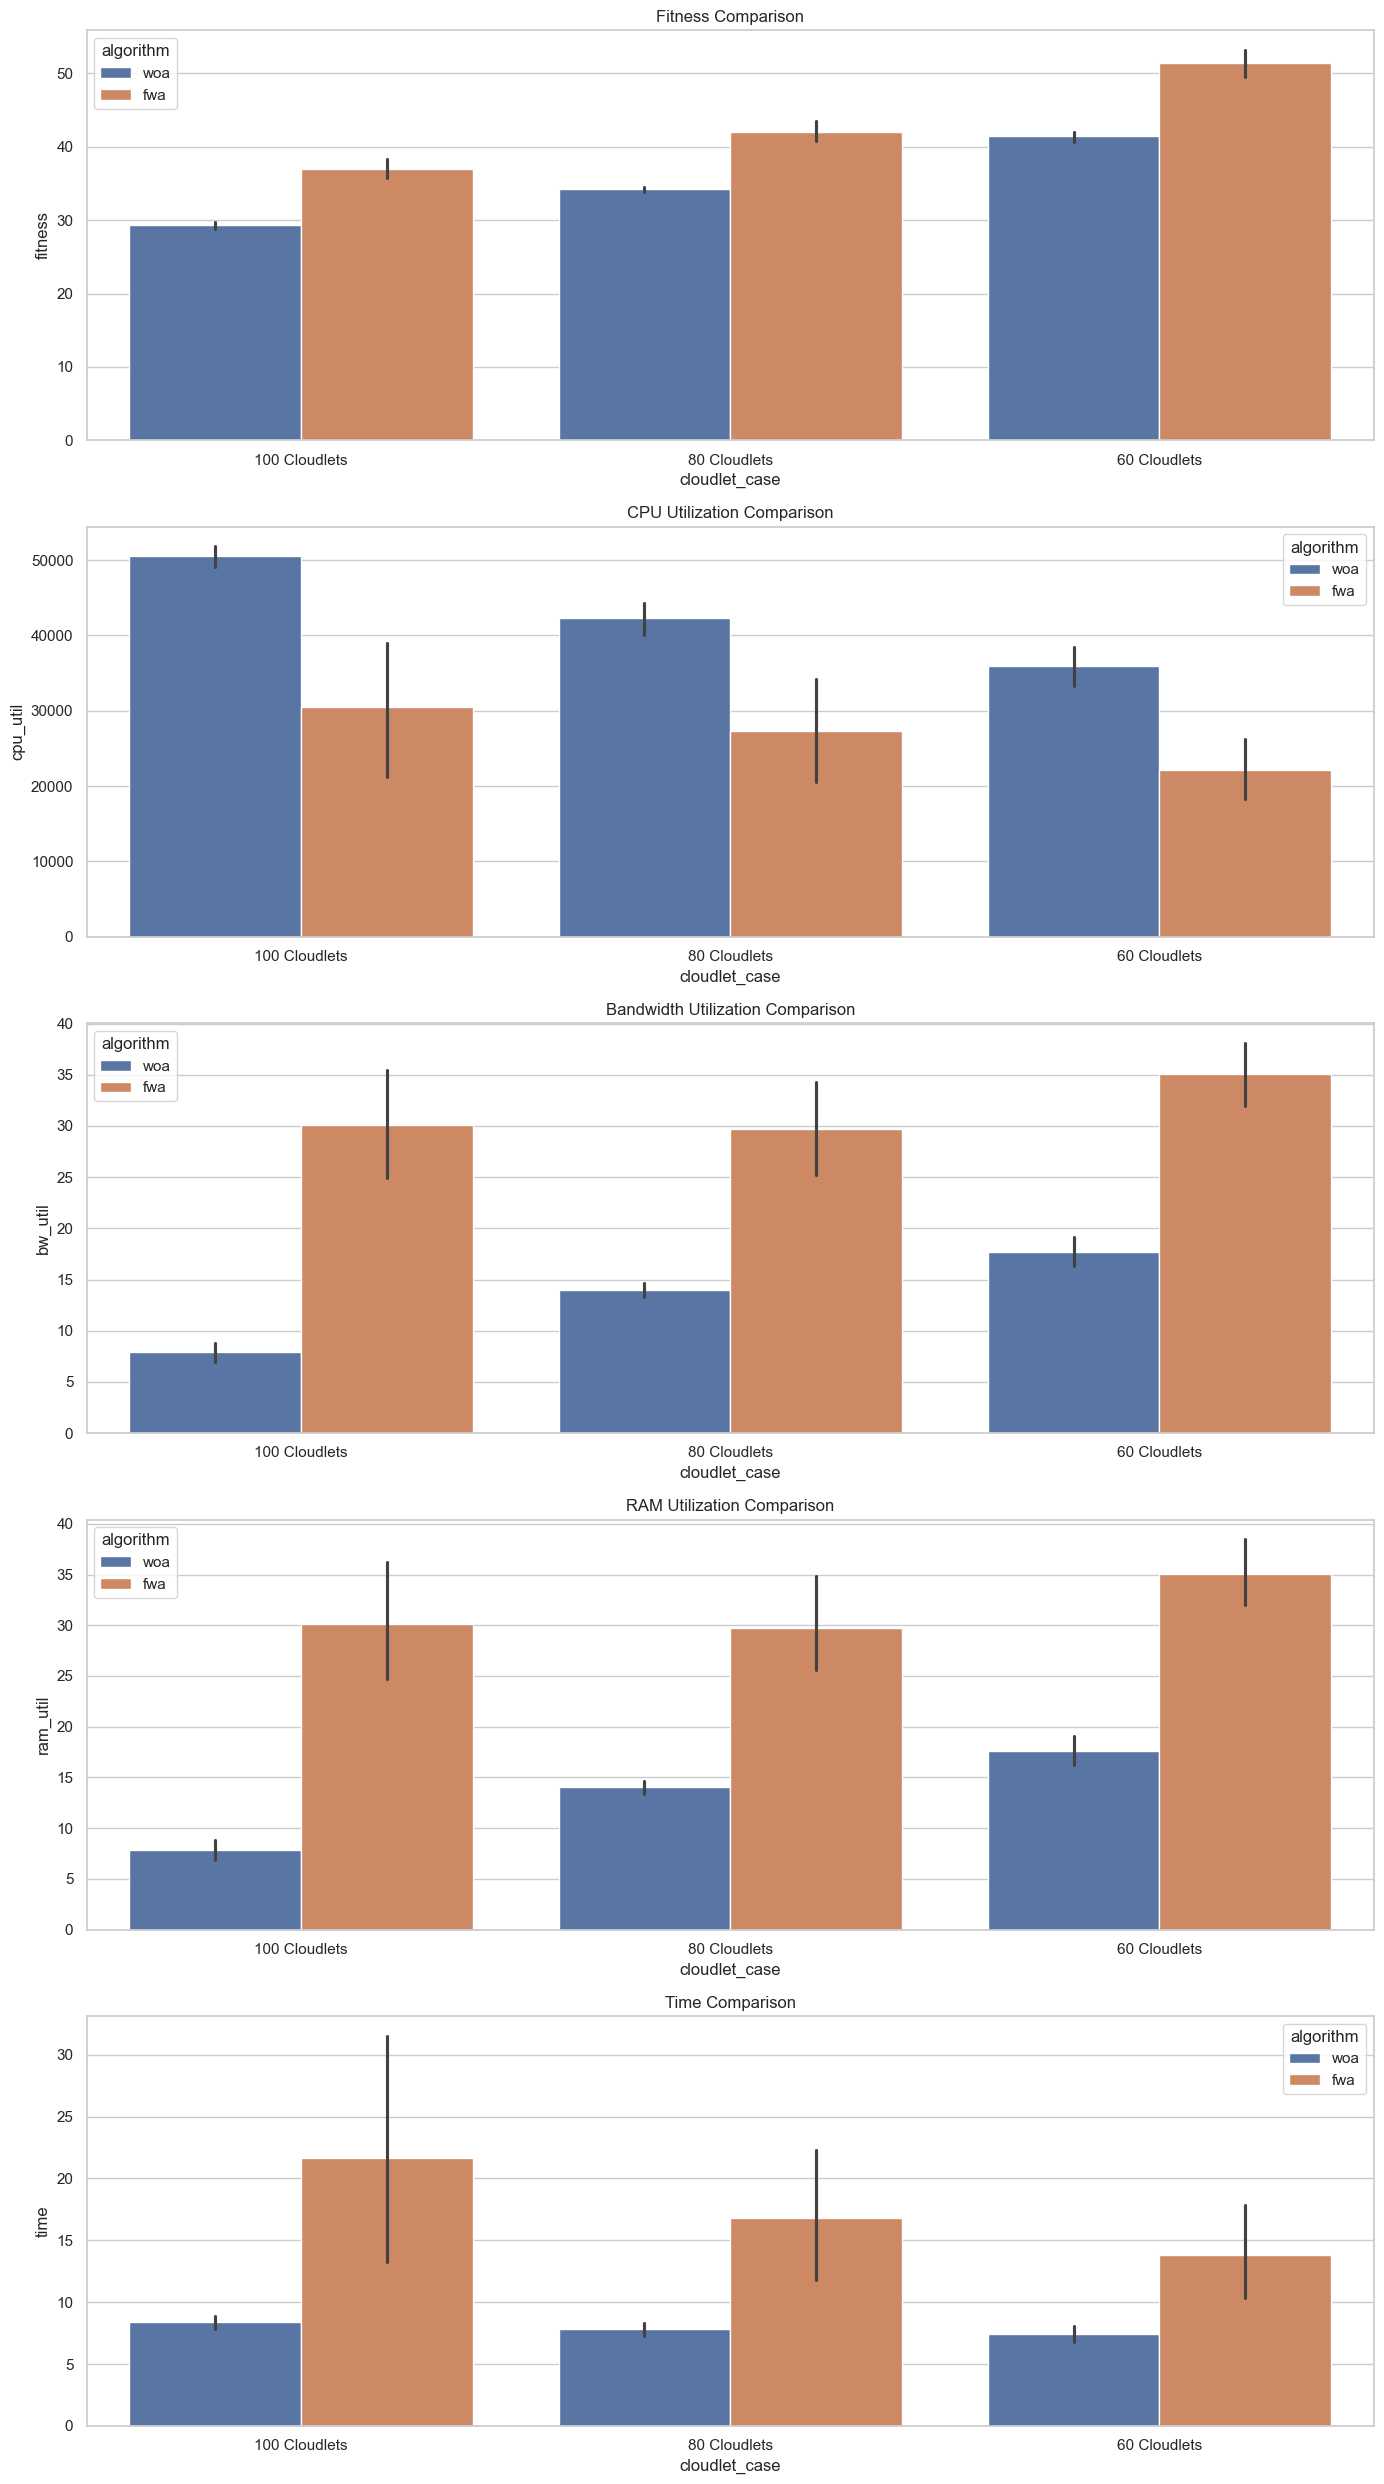

In [10]:
# Create the bar plots
fig, axes = plt.subplots(5, 1, figsize=(14, 25))  # 5 rows and 1 column for each plot

# Plot Fitness
sns.barplot(x='cloudlet_case', y='fitness', hue='algorithm', data=combined_df, ax=axes[0])
axes[0].set_title('Fitness Comparison')

# Plot CPU Utilization
sns.barplot(x='cloudlet_case', y='cpu_util', hue='algorithm', data=combined_df, ax=axes[1])
axes[1].set_title('CPU Utilization Comparison')

# Plot Bandwidth Utilization
sns.barplot(x='cloudlet_case', y='bw_util', hue='algorithm', data=combined_df, ax=axes[2])
axes[2].set_title('Bandwidth Utilization Comparison')

# Plot RAM Utilization
sns.barplot(x='cloudlet_case', y='ram_util', hue='algorithm', data=combined_df, ax=axes[3])
axes[3].set_title('RAM Utilization Comparison')

# Plot Time
sns.barplot(x='cloudlet_case', y='time', hue='algorithm', data=combined_df, ax=axes[4])
axes[4].set_title('Time Comparison')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Comparison of WOA,FWA & SEQUENTIAL**

In [11]:
# Rename columns in input1 (fwa) to match input (woa), if necessary
input_fwa.rename(columns={
    'fwa_time': 'time',
    'fwa_fitness': 'fitness',
    'fwa_cpu_util': 'cpu_util',
    'fwa_bw_util': 'bw_util',
    'fwa_ram_util': 'ram_util'
}, inplace=True)

input_woa.rename(columns={
    'woa_time': 'time',
    'woa_fitness': 'fitness',
    'woa_cpu_util': 'cpu_util',
    'woa_bw_util': 'bw_util',
    'woa_ram_util': 'ram_util'
}, inplace=True)

input_seq.rename(columns={
    'seq_time': 'time',
    'seq_fitness': 'fitness',
    'seq_cpu_util': 'cpu_util',
    'seq_bw_util': 'bw_util',
    'seq_ram_util': 'ram_util'
}, inplace=True)

# Adding a column to distinguish 'woa' from 'fwa' in both datasets
input_woa['algorithm'] = 'woa'
input_fwa['algorithm'] = 'fwa'
input_seq['algorithm'] = 'seq'

# Filter data for different cloudlet cases in the 'woa' dataset
cloudlet_100_woa = input_woa[input_woa['cloudlets'] == 100]
cloudlet_80_woa = input_woa[input_woa['cloudlets'] == 80]
cloudlet_60_woa = input_woa[input_woa['cloudlets'] == 60]

# Filter data for different cloudlet cases in the 'fwa' dataset (input_fwa)
cloudlet_100_fwa = input_fwa[input_fwa['cloudlets'] == 100]
cloudlet_80_fwa = input_fwa[input_fwa['cloudlets'] == 80]
cloudlet_60_fwa = input_fwa[input_fwa['cloudlets'] == 60]

# Filter data for different cloudlet cases in the 'seq' dataset (input_seq)
cloudlet_100_seq = input_seq[input_seq['cloudlets'] == 100]
cloudlet_80_seq = input_seq[input_seq['cloudlets'] == 80]
cloudlet_60_seq = input_seq[input_seq['cloudlets'] == 60]

# Add a 'cloudlet_case' column to each subset
cloudlet_100_woa['cloudlet_case'] = '100 Cloudlets'
cloudlet_80_woa['cloudlet_case'] = '80 Cloudlets'
cloudlet_60_woa['cloudlet_case'] = '60 Cloudlets'

cloudlet_100_fwa['cloudlet_case'] = '100 Cloudlets'
cloudlet_80_fwa['cloudlet_case'] = '80 Cloudlets'
cloudlet_60_fwa['cloudlet_case'] = '60 Cloudlets'

cloudlet_100_seq['cloudlet_case'] = '100 Cloudlets'
cloudlet_80_seq['cloudlet_case'] = '80 Cloudlets'
cloudlet_60_seq['cloudlet_case'] = '60 Cloudlets'

# Combine both 'woa' and 'fwa' datasets for all cloudlet cases into a single DataFrame
combined_df_woa = pd.concat([cloudlet_100_woa, cloudlet_80_woa, cloudlet_60_woa], axis=0)
combined_df_fwa = pd.concat([cloudlet_100_fwa, cloudlet_80_fwa, cloudlet_60_fwa], axis=0)
combined_df_seq = pd.concat([cloudlet_100_seq, cloudlet_80_seq, cloudlet_60_seq], axis=0)

# Combine the 'woa' and 'fwa' datasets into one DataFrame
combined_df = pd.concat([combined_df_woa, combined_df_fwa, combined_df_seq], axis=0)


C:\Users\User\AppData\Local\Temp\ipykernel_21520\2722028841.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudlet_100_woa['cloudlet_case'] = '100 Cloudlets'
C:\Users\User\AppData\Local\Temp\ipykernel_21520\2722028841.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cloudlet_80_woa['cloudlet_case'] = '80 Cloudlets'
C:\Users\User\AppData\Local\Temp\ipykernel_21520\2722028841.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

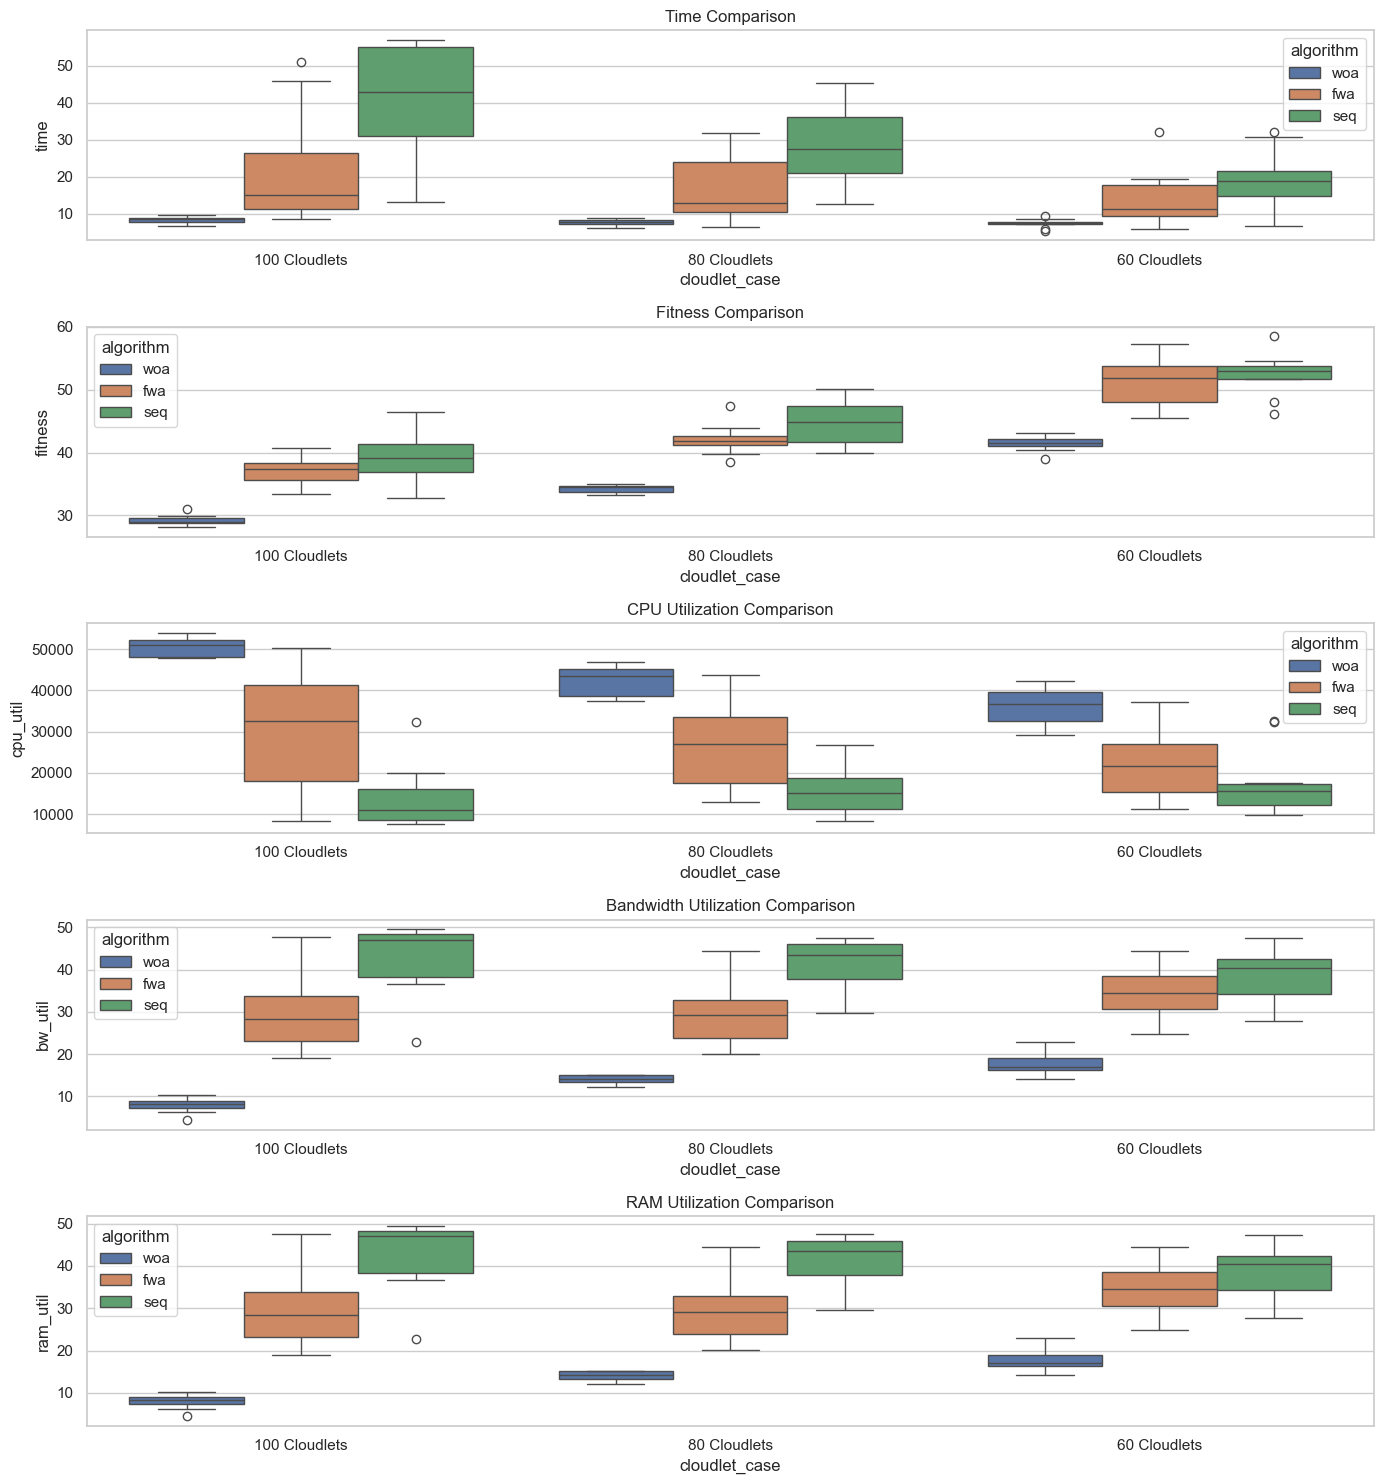

In [12]:
# Set plot style
sns.set(style="whitegrid")

fig, axes = plt.subplots(5, 1, figsize=(14, 15))

# Plot Time
sns.boxplot(x='cloudlet_case', y='time', hue='algorithm', data=combined_df, ax=axes[0])
axes[0].set_title('Time Comparison')

# Plot Fitness
sns.boxplot(x='cloudlet_case', y='fitness', hue='algorithm', data=combined_df, ax=axes[1])
axes[1].set_title('Fitness Comparison')

# Plot CPU Utilization
sns.boxplot(x='cloudlet_case', y='cpu_util', hue='algorithm', data=combined_df, ax=axes[2])
axes[2].set_title('CPU Utilization Comparison')

# Plot Bandwidth Utilization
sns.boxplot(x='cloudlet_case', y='bw_util', hue='algorithm', data=combined_df, ax=axes[3])
axes[3].set_title('Bandwidth Utilization Comparison')

# Plot RAM Utilization
sns.boxplot(x='cloudlet_case', y='ram_util', hue='algorithm', data=combined_df, ax=axes[4])
axes[4].set_title('RAM Utilization Comparison')



# Adjust layout and show legend
plt.tight_layout()
plt.show()


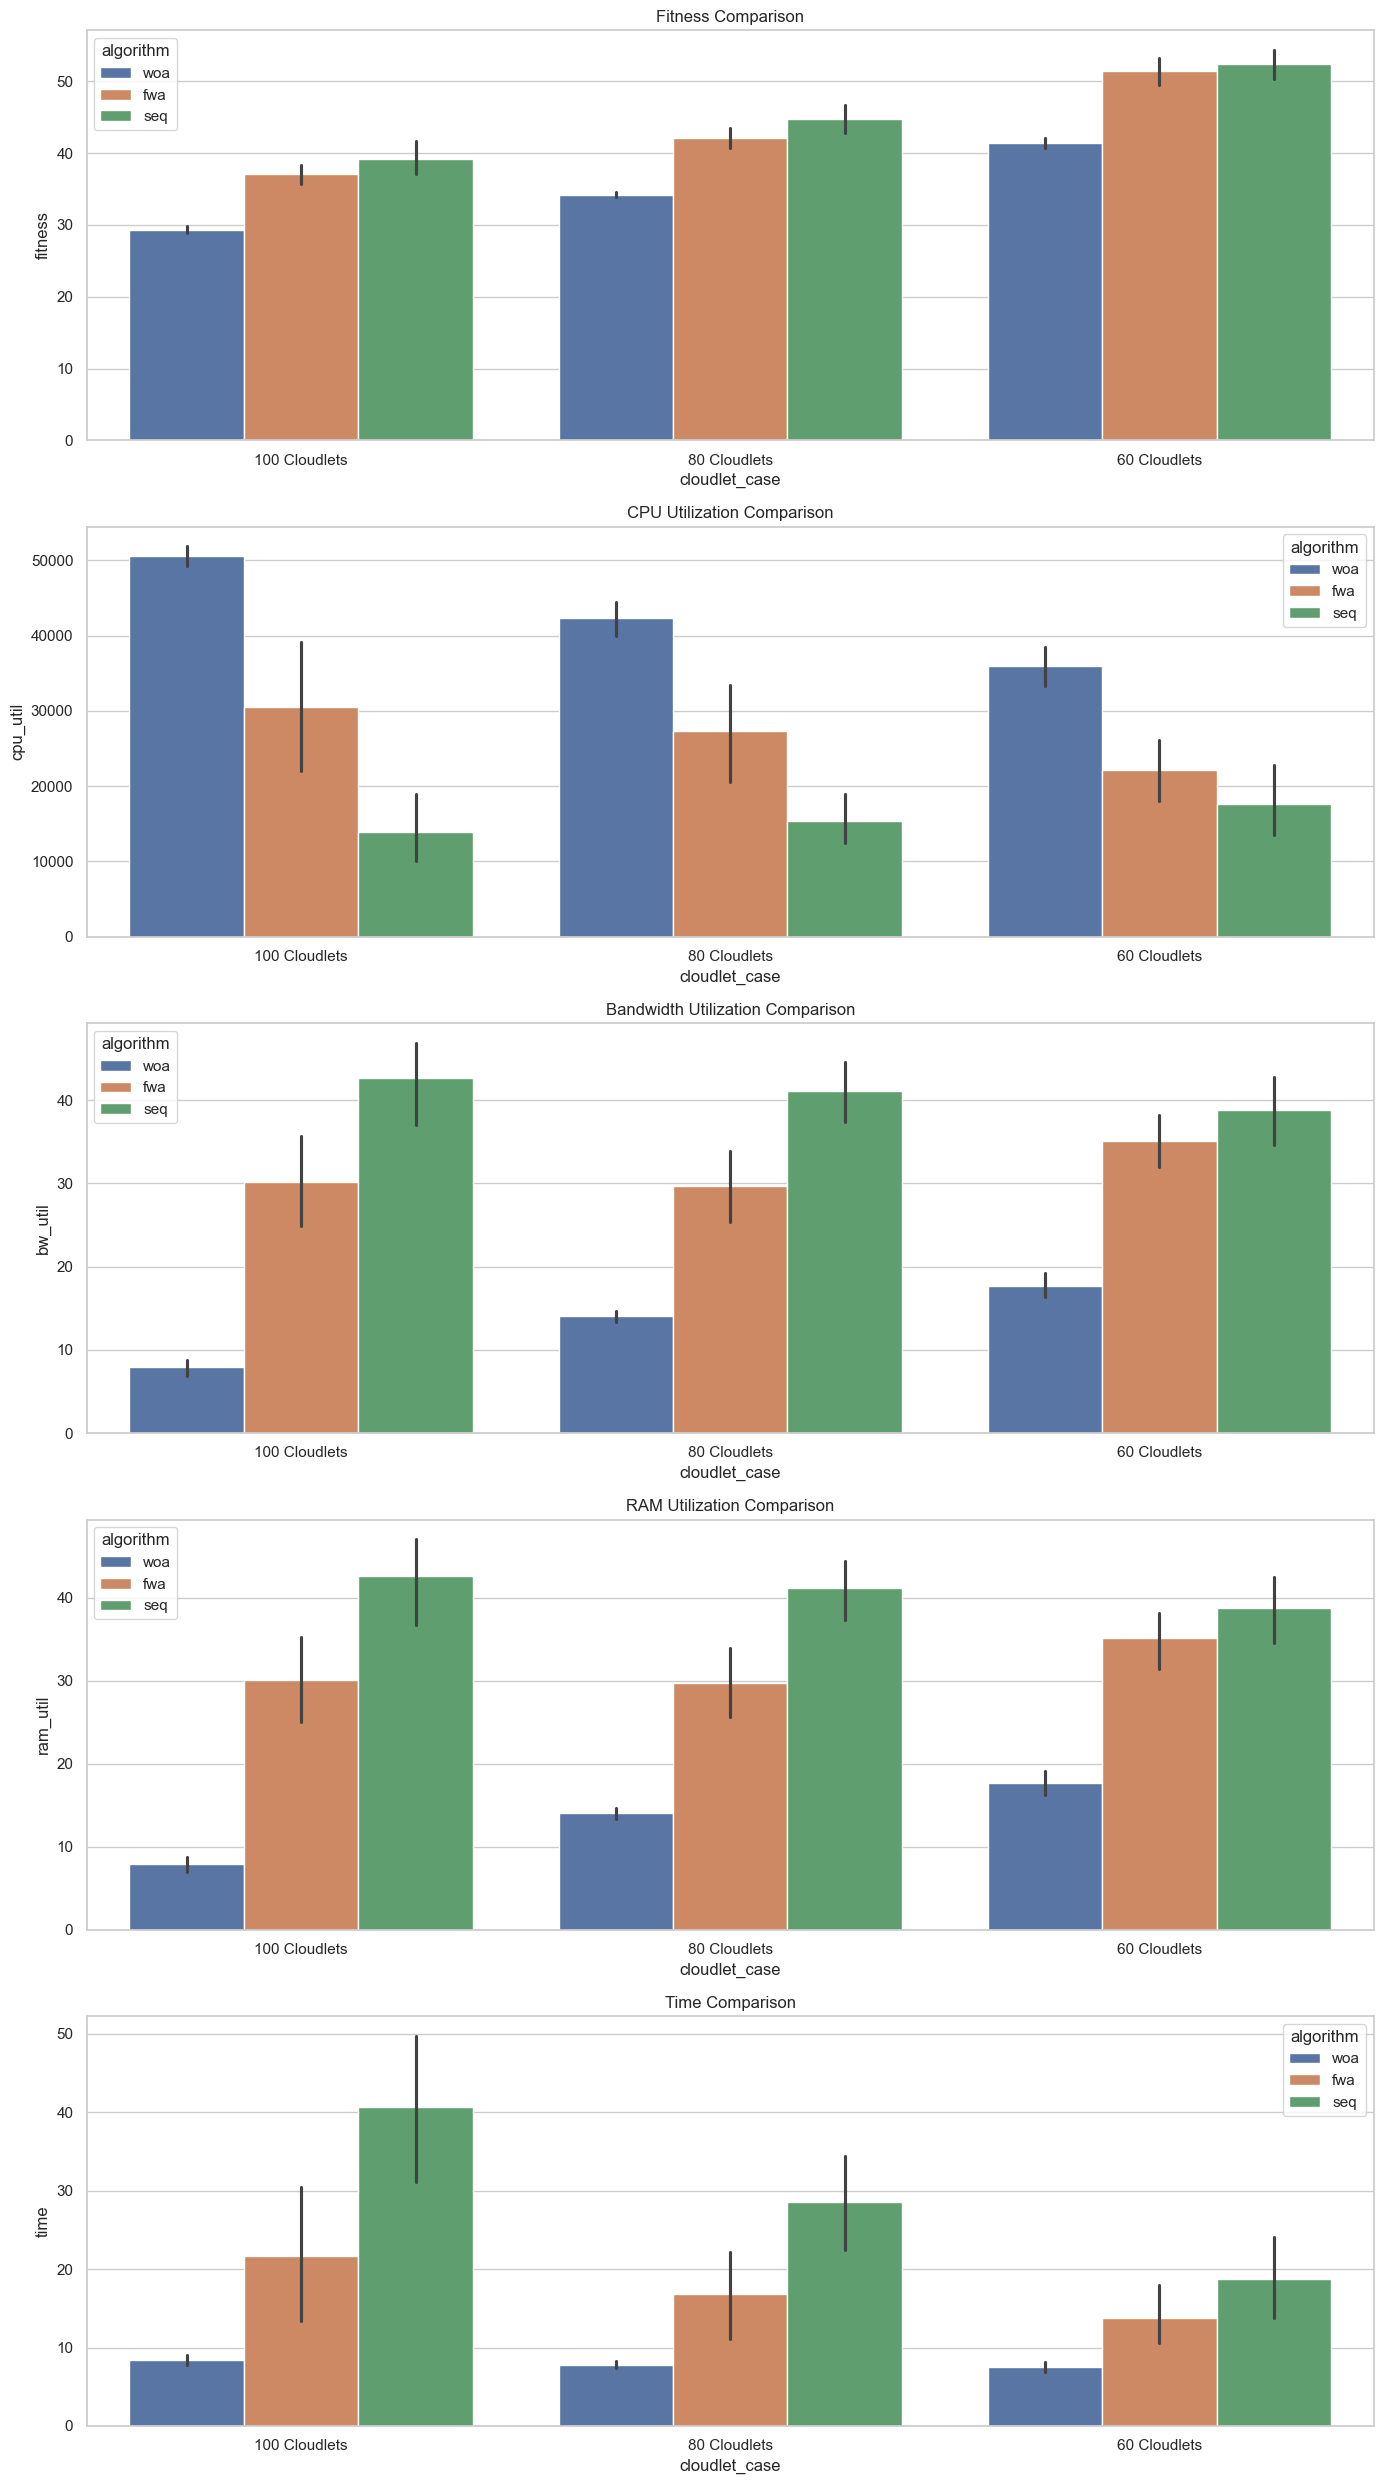

In [13]:
# Create the bar plots
fig, axes = plt.subplots(5, 1, figsize=(14, 25))  # 5 rows and 1 column for each plot

# Plot Fitness
sns.barplot(x='cloudlet_case', y='fitness', hue='algorithm', data=combined_df, ax=axes[0])
axes[0].set_title('Fitness Comparison')

# Plot CPU Utilization
sns.barplot(x='cloudlet_case', y='cpu_util', hue='algorithm', data=combined_df, ax=axes[1])
axes[1].set_title('CPU Utilization Comparison')

# Plot Bandwidth Utilization
sns.barplot(x='cloudlet_case', y='bw_util', hue='algorithm', data=combined_df, ax=axes[2])
axes[2].set_title('Bandwidth Utilization Comparison')

# Plot RAM Utilization
sns.barplot(x='cloudlet_case', y='ram_util', hue='algorithm', data=combined_df, ax=axes[3])
axes[3].set_title('RAM Utilization Comparison')

# Plot Time
sns.barplot(x='cloudlet_case', y='time', hue='algorithm', data=combined_df, ax=axes[4])
axes[4].set_title('Time Comparison')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()